In [1]:
!pip install pyspark

     -------------------------------------- 281.4/281.4 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 199.7/199.7 kB 1.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824023 sha256=4b24e166a011682af99aed87c4136edb4ed2125c9dcc9f23411b0dab4e3aa73d
  Stored in directory: c:\users\akash\appdata\local\pip\cache\wheels\6c\e3\9b\0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark


In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
!unzip "/content/drive/MyDrive/Cyclone_Wildfire_Flood_Earthquake_Database.zip"

Archive:  /content/drive/MyDrive/Cyclone_Wildfire_Flood_Earthquake_Database.zip
   creating: Cyclone_Wildfire_Flood_Earthquake_Database/
   creating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/0.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/1.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/10.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/100.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/101.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/102.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/103.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/104.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/105.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/106.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone

In [ ]:
! pip install python_splitter 
import python_splitter
python_splitter.split_from_folder("/content/Cyclone_Wildfire_Flood_Earthquake_Database", train=0.8, test=0.2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
✅Checking SOURCE directory...
0.8 0 0.2
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


In [ ]:
import os
import matplotlib.pyplot as plt
import glob
from skimage import io
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras

In [ ]:
train_dir='/content/Train_Test_Folder/train'
test_dir='/content/Train_Test_Folder/test'

In [ ]:
test_list=os.listdir(test_dir) 
print("Length of testing list is",len(test_list) ) 
train_list=os.listdir(train_dir)
print("Length of training list is",len(train_list))

#SORTING THEM FOR REFERENCE
train_list.sort()
test_list.sort()
#viewing items
#test_list[0:5]

print("The training list is : ",train_list)

Length of testing list is 4
Length of training list is 4
The training list is :  ['Cyclone', 'Earthquake', 'Flood', 'Wildfire']


In [ ]:
train_list_mod=['Cyclone', 'Earthquake', 'Flood', 'Wildfire']
print(train_list_mod)

['Cyclone', 'Earthquake', 'Flood', 'Wildfire']


In [ ]:
def data_dictionary():
    path_train=train_dir
    path_test=test_dir
    list_train= train_list   #os.listdir(path_train) 
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disaster_train=path_train+"/"+i
        path_disaster_test=path_test+"/"+i
        image_list_train=os.listdir(path_disaster_train)
        image_list_test=os.listdir(path_disaster_test)
        for j in image_list_train:
            img_path_train=path_disaster_train+"/"+j
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k) 
        for m in image_list_test :
            img_path_test=path_disaster_test+"/"+m
            test_dictionary["image_path"].append(img_path_test)
            test_dictionary['target'].append(k)
        k+=1 
    test_df=pd.DataFrame(test_dictionary)
    train_df=pd.DataFrame(train_dictionary)
    # print(test_df.head(5))
    # print(train_df.head(5))
        
    return  train_df,test_df

(814, 1119, 3)
(1046, 700, 3)
(540, 960, 3)
(350, 590, 3)


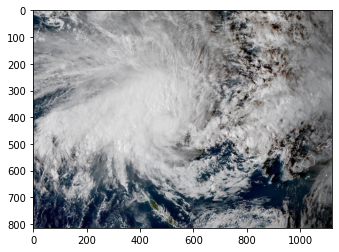

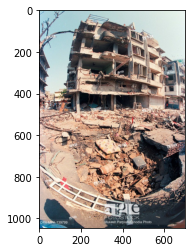

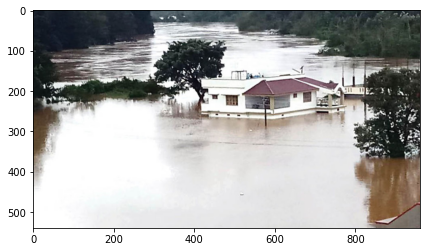

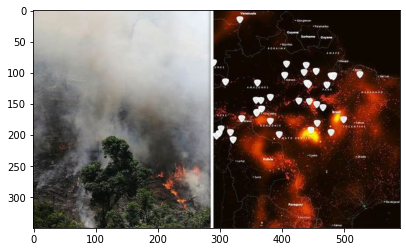

In [ ]:
# Plotting images 
for disaster_class in train_list_mod:  

    disaster_path = os.path.join(train_dir, disaster_class, '*')
    disaster_path = glob.glob(disaster_path)  
    
    # accessing an image file from the dataset classes
    image = io.imread(disaster_path[1])  

    # plotting the original image
    i, (im1) = plt.subplots(1)
    i.set_figwidth(15)
    im1.imshow(image)
    print(image.shape)

In [ ]:
def load_data(input_size=(240,240)):
    images=[]
    images2=[]
    train_df,test_df=data_dictionary()
    for i in train_df['image_path']:
        img=cv2.imread(i)
        img=cv2.resize(img,input_size)
        images.append(img)
    y_train=np.asarray(train_df['target'])
    x_train=np.asarray(images)
    for i in test_df['image_path']:
        img=cv2.imread(i)
        img=cv2.resize(img,input_size)
        images2.append(img)
    y_test=np.asarray(test_df['target'])
    x_test=np.asarray(images2)
    return x_train,x_test,y_train,y_test



In [ ]:
x_train,x_test,y_train,y_test=load_data(input_size=(240,240))

In [ ]:
# progressively loading images from file
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create generator
# generator applied random preprocessing to make the model --> robust
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2, # every image will be randomly distorted 0-0.2
                             zoom_range = 0.2, # every image will be randomly zoomed 0-0.2
                             horizontal_flip = True, #
                             vertical_flip=True,
                             rotation_range=30,
                             validation_split=0.3)

In [ ]:
train_it = datagen.flow_from_directory( train_dir,
                                       subset='training', 
                                       class_mode='categorical',
                                       target_size=(240, 240),
                                       batch_size=10,
                                       seed=7)

Found 2480 images belonging to 4 classes.


In [ ]:
val_it = datagen.flow_from_directory( train_dir,
                                       subset='validation', 
                                       class_mode='categorical',
                                       target_size=(240, 240),
                                       batch_size=10,
                                       seed=7)

Found 1061 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3),padding='same',activation='relu',input_shape=(240,240,3)))
# model.add(MaxPooling2D(pool_size=(3,3)))
# REPEAT CONV AND POOLING layer 3 TIMES
model.add(Conv2D(64, (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5)))
model.add(Conv2D(32, (3,3),padding='same',activation='relu'))
model.add(Conv2D(256, (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5)))
model.add(Flatten())
# any no of dense layers
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 240, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       73984     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 256)        0         
 2D)                                                    

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
history = model.fit( 
  train_it,
  validation_data=val_it,
  epochs=10,verbose= True)

Epoch 1/10
248/248 [==============================] - 152s 566ms/step - loss: 1.1067 - accuracy: 0.5044 - val_loss: 0.8074 - val_accuracy: 0.6786
Epoch 2/10
248/248 [==============================] - 179s 724ms/step - loss: 0.8046 - accuracy: 0.6798 - val_loss: 0.6917 - val_accuracy: 0.7304
Epoch 3/10
248/248 [==============================] - 177s 714ms/step - loss: 0.7025 - accuracy: 0.7206 - val_loss: 0.7054 - val_accuracy: 0.7333
Epoch 4/10
248/248 [==============================] - 140s 564ms/step - loss: 0.7026 - accuracy: 0.7335 - val_loss: 0.5950 - val_accuracy: 0.7804
Epoch 5/10
248/248 [==============================] - 143s 578ms/step - loss: 0.6077 - accuracy: 0.7681 - val_loss: 0.4831 - val_accuracy: 0.8172
Epoch 6/10
248/248 [==============================] - 140s 565ms/step - loss: 0.5432 - accuracy: 0.7944 - val_loss: 0.4889 - val_accuracy: 0.8238
Epoch 7/10
248/248 [==============================] - 177s 717ms/step - loss: 0.5723 - accuracy: 0.7819 - val_loss: 0.5414 -

In [ ]:
from tensorflow.keras.applications import  VGG19
from tensorflow.keras.models import Model
from keras.applications.vgg19 import preprocess_input


In [ ]:
vgg19 = VGG19(include_top=False,weights='imagenet')

In [ ]:
vgg19.summary()


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
train_img=preprocess_input(x_train)
test_img=preprocess_input(x_test)
num_train=x_train.shape[0]
num_test=x_test.shape[0]

In [ ]:
features_train=vgg19.predict(train_img)

111/111 [==============================] - 31s 191ms/step


In [ ]:
features_test=vgg19.predict(test_img)

28/28 [==============================] - 7s 272ms/step


In [ ]:
features_train.shape

(3541, 7, 7, 512)

In [ ]:
features_test.shape

(887, 7, 7, 512)

In [ ]:
num_train=x_train.shape[0]
num_test=x_test.shape[0]

In [ ]:
print(num_train,num_test)

3541 887


In [ ]:
x_train=features_train.reshape(num_train,25088)
x_test=features_test.reshape(num_test,25088)

In [ ]:
model1=Sequential([ Dense(1024,activation='relu'),
                   Dense(512,activation='relu'),
                  Dense(256,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(4,activation='softmax')])

In [ ]:
model1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'] )

In [ ]:
model1.fit(x_train,y_train,batch_size=10,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
355/355 [==============================] - 7s 12ms/step - loss: 1.4398 - accuracy: 0.8774 - val_loss: 0.1885 - val_accuracy: 0.9515
Epoch 2/10
355/355 [==============================] - 4s 11ms/step - loss: 0.2331 - accuracy: 0.9568 - val_loss: 0.2577 - val_accuracy: 0.9504
Epoch 3/10
355/355 [==============================] - 3s 10ms/step - loss: 0.1056 - accuracy: 0.9811 - val_loss: 0.2732 - val_accuracy: 0.9504
Epoch 4/10
355/355 [==============================] - 6s 18ms/step - loss: 0.1854 - accuracy: 0.9777 - val_loss: 0.8092 - val_accuracy: 0.9346
Epoch 5/10
355/355 [==============================] - 6s 17ms/step - loss: 0.1145 - accuracy: 0.9845 - val_loss: 0.9227 - val_accuracy: 0.9301
Epoch 6/10
355/355 [==============================] - 5s 14ms/step - loss: 0.1110 - accuracy: 0.9862 - val_loss: 0.4793 - val_accuracy: 0.9481
Epoch 7/10
355/355 [==============================] - 7s 19ms/step - loss: 0.1002 - accuracy: 0.9862 - val_loss: 0.8872 - val_accuracy: 0.9346

In [ ]:
from sklearn.metrics import classification_report
predictions = model1.predict(x_test, batch_size=10)
print(classification_report(y_test,
	predictions.argmax(axis=1), target_names=train_list_mod))

89/89 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Cyclone       1.00      0.97      0.98       186
  Earthquake       0.93      0.96      0.95       270
       Flood       0.95      0.87      0.91       215
    Wildfire       0.92      1.00      0.96       216

    accuracy                           0.95       887
   macro avg       0.95      0.95      0.95       887
weighted avg       0.95      0.95      0.95       887



In [ ]:
# construct a plot that plots and saves the training history
plt.style.use("ggplot")
plt.figure()
plt.plot(model1.history.history['loss'], label="train_loss")
plt.plot(model1.history.history["val_loss"], label="val_loss")
#plt.plot(model.history.history["accuracy"], label="train_acc")
#plt.plot(model.history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")



In [ ]:
plt.plot(model1.history.history['accuracy'],label="train_accuracy")
plt.plot(model1.history.history['val_accuracy'],label="validation_accuracy")
plt.legend()
plt.show()


In [ ]:
    
def load_img(img_path):
    images=[]
    img=cv2.imread(img_path)
    img=cv2.resize(img,(240,240))
    images.append(img)
    x_test=np.asarray(images)
    test_img=preprocess_input(x_test)
    features_test=vgg19.predict(test_img)
    num_test=x_test.shape[0]
    f_img=features_test.reshape(num_test,25088)
    
    return f_img
    

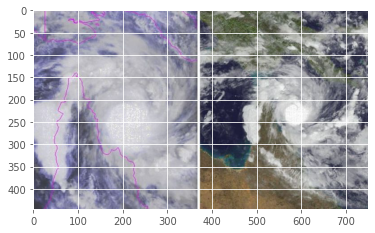

In [ ]:
img=Image.open("/content/Train_Test_Folder/test/Cyclone/101.jpg")
plt.imshow(img)

In [ ]:
img1=load_img("/content/Train_Test_Folder/test/Cyclone/0.jpg")

1/1 [==============================] - 0s 24ms/step


In [ ]:
np.argmax(model1.predict(img1))

1/1 [==============================] - 0s 20ms/step


0

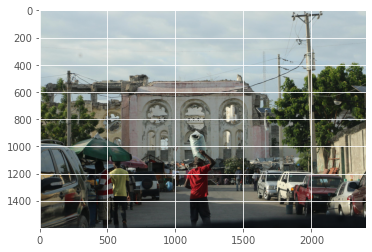

In [ ]:
img=Image.open("/content/Train_Test_Folder/test/Earthquake/100.jpg")
plt.imshow(img)

In [ ]:
img2=load_img("/content/Train_Test_Folder/test/Earthquake/100.jpg")

1/1 [==============================] - 0s 25ms/step


In [ ]:
np.argmax(model1.predict(img2))

1/1 [==============================] - 0s 28ms/step


1

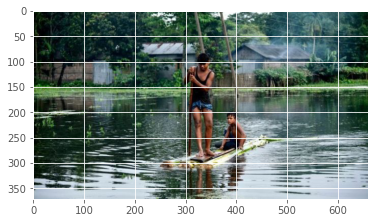

In [ ]:
img=Image.open("/content/Train_Test_Folder/test/Flood/1005.jpg")
plt.imshow(img)

In [ ]:
img3=load_img("/content/Train_Test_Folder/test/Flood/1005.jpg")

1/1 [==============================] - 0s 37ms/step


In [ ]:
np.argmax(model1.predict(img3))

1/1 [==============================] - 0s 29ms/step


2

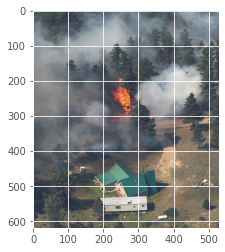

In [ ]:
img=Image.open("/content/Train_Test_Folder/test/Wildfire/1014.jpg")
plt.imshow(img)

In [ ]:
img4=load_img("/content/Train_Test_Folder/test/Wildfire/1014.jpg")

1/1 [==============================] - 0s 29ms/step


In [ ]:
np.argmax(model1.predict(img4))

1/1 [==============================] - 0s 62ms/step


3

In [ ]:
def disaster_basic(image_list):
  train_list_mod=['Cyclone', 'Earthquake', 'Flood', 'Wildfire']
  for images in image_list:
    pred=np.argmax(model.predict(images))
    print("Image is of",train_list_mod[pred])

In [ ]:
image_list=[img1,img2,img3,img4]
disaster_basic(image_list)

1/1 [==============================] - 0s 33ms/step
Image is of Wildfire
1/1 [==============================] - 0s 33ms/step
Image is of Wildfire
1/1 [==============================] - 0s 19ms/step
Image is of Wildfire
1/1 [==============================] - 0s 24ms/step
Image is of Earthquake


In [ ]:
def disaster(image_list):
  train_list_mod=['Cyclone', 'Earthquake', 'Flood', 'Wildfire']
  for images in image_list:
    pred=np.argmax(model1.predict(images))
    print("Image is of",train_list_mod[pred])
  

In [ ]:
image_list=[img1,img2,img3,img4]
disaster(image_list)

1/1 [==============================] - 0s 30ms/step
Image is of Cyclone
1/1 [==============================] - 0s 32ms/step
Image is of Earthquake
1/1 [==============================] - 0s 38ms/step
Image is of Flood
1/1 [==============================] - 0s 36ms/step
Image is of Wildfire
